### **Data Analysis Mathematics, Algorithms and Modeling - PROG8431**
### **Group Presentation 6**
#### Conestoga College, School of Applied CS & IT, Course Instructor - Darryl Poworoznyk


#### **Group 6**
#### Members:
| **Name**                 | **Student ID** | **Email**       |
|--------------------------|----------------|-----------------|
| Christo Pananjickal Baby | 8989796        | Cpananjickalbab9796@conestogac.on.ca|
| Kumari Nikitha Singh     | 9053016       | Ksingh3016@conestogac.on.ca|
| Srinu Babu Rai           | 8994032  |Srai4032@conestogac.on.ca |

### Dataset Overview: `personality_synthetic_dataset_random_datetime.csv`

This dataset contains **20,000 rows** and **34 columns**. Each row represents an individual observation with synthetic attributes related to **personality traits**, **behavioural tendencies**, and **productivity under stress**. The dataset is ideal for predictive modeling and time series analysis.

---

#### General Structure

| Metric      | Value        |
|-------------|--------------|
| Rows        | 20,000       |
| Columns     | 34           |
| Data Types  | Numerical, Categorical, Timestamp |

---

#### Key Feature Categories

| Column Name               | Description |
|---------------------------|-------------|
| `personality_type`        | Categorical label: `Introvert`, `Ambivert`, or `Extrovert`. |
| `social_energy` to `friendliness` | Personality trait scores (scale: 0–10). |
| `emotional_stability`, `planning`, `spontaneity`, `adventurousness` | Emotional and decision-making traits. |
| `reading_habit`, `sports_interest`, `gadget_usage` | Lifestyle preference scores. |
| `online_social_usage`, `travel_desire` | Technology and exploration indicators. |
| `work_style_collaborative`, `decision_speed` | Professional behavior-related metrics. |
| `stress_handling`         | Ability to manage stress (0–10). |
| `productivity_score`      | Productivity score under stress (target variable). |
| `stress_level`            | Recorded stress level at the time of data entry. |
| `datetime`                | Timestamp of the recorded observation. |
| `month`                   | Extracted month from the datetime column. |

### Project Objective

This project investigates how certain personality traits influence stress levels, productivity, and personality classification.

We specifically focus on:
- **Emotional Stability** – ability to remain calm under pressure
- **Spontaneity** – tendency to act on impulse
- **Work Style (Collaborative)** – preference for teamwork vs. independent work

### Goals:
- Analyze correlations between traits and stress/productivity
- Predict personality type using logistic classification
- Use probabilistic reasoning to estimate personality likelihood based on trait thresholds

This builds upon our previous work with new features and deeper statistical techniques.

### Dataset Overview

The dataset `personality_synthetic_dataset_random_datetime.csv` contains **20,000 rows** and **34 columns**. Each row represents an individual with synthetic measurements related to personality traits, behavior, and stress/productivity levels.

#### Key Column Types:
- **Target:** `personality_type` (Introvert, Ambivert, Extrovert)
- **Numerical Traits:** 31 columns with float values (e.g., emotional_stability, spontaneity, gadget_usage)
- **Timestamps:** `datetime` and `month` columns for time-based analysis

#### Sample Features:
- `emotional_stability`, `spontaneity`, `work_style_collaborative`: Personality-based traits
- `stress_level`, `productivity_score`: Indicators of mental and work performance
- `gadget_usage`, `travel_desire`: Behavioral preferences

This dataset is well-suited for statistical correlation, classification, and probabilistic reasoning.


### Revised Hypothesis Testing

#### Hypothesis 1: Emotional Stability and Productivity

- **H₀ (Null Hypothesis):** Emotional stability has no significant correlation with productivity score.
- **H₁ (Alternative Hypothesis):** Emotional stability is positively correlated with productivity score.

#### Hypothesis 2: Work Style and Stress Level

- **H₀ (Null Hypothesis):** Collaborative work style has no significant effect on stress level.
- **H₁ (Alternative Hypothesis):** Individuals with a more collaborative work style experience lower stress levels.

These hypotheses will be tested using Pearson’s correlation, visualization, and classification methods.



### Import Required Libraries

In [1]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# For probability and statistics
from scipy.stats import pearsonr

# Set display options
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


### Load and Preview the Dataset

In [2]:
# Load the dataset
df = pd.read_csv("personality_synthetic_dataset_random_datetime.csv")

# Display dataset shape
print("Dataset Shape:", df.shape)

# Display first 5 rows
print("\nFirst 5 Rows:")
display(df.head())


Dataset Shape: (20000, 34)

First 5 Rows:


,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling,productivity_score,stress_level,datetime,month
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905,4.610771,2.877187,2025-07-03 12:00:39.964023,2025-07
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577,3.752968,7.563477,2025-07-02 11:09:57.003468,2025-07
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480,6.079154,4.678659,2025-07-01 14:11:21.824633,2025-07
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088,4.949075,4.299012,2025-07-02 20:34:14.615997,2025-07
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084,5.659179,6.305141,2025-07-01 03:19:01.763267,2025-07


### Data Cleaning and Preprocessing

We performed the following preprocessing steps:

1. **Missing Values Check:** Verified there are no missing entries in the dataset.
2. **Datetime Conversion:** Converted the `datetime` column to proper datetime format for time-based analysis.
3. **Month Format:** Ensured the `month` column is stored as string for grouping or filtering.
4. **Label Encoding:** Encoded the categorical `personality_type` column into numerical values using:
   - Introvert → 0
   - Ambivert → 1
   - Extrovert → 2
5. **NaT Handling:** Dropped rows with invalid datetime entries (if any) resulting from coercion.

This cleaned dataset is now ready for correlation analysis and modeling.


In [6]:
# Check and report missing values more clearly
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

if missing_counts.empty:
    print(" No missing values found in the dataset.")
else:
    print("Missing values detected:\n", missing_counts)

# Datetime and encoding
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['month'] = df['month'].astype(str)
df['personality_encoded'] = df['personality_type'].map({
    'Introvert': 0,
    'Ambivert': 1,
    'Extrovert': 2
})

# Drop invalid datetime rows
df = df.dropna(subset=['datetime'])

# Confirm data types
print("\nData types after cleaning:")
print(df.dtypes[['datetime', 'month', 'personality_encoded']])


 No missing values found in the dataset.

Data types after cleaning:
datetime               datetime64[ns]
month                          object
personality_encoded             int64
dtype: object


### Pearson’s Correlation Analysis

We'll compute the Pearson correlation between selected personality traits and two key metrics:

**productivity_score**

**stress_level**

In [7]:
# Select relevant numeric columns (excluding encoded and identifiers)
traits = [
    'emotional_stability',
    'spontaneity',
    'work_style_collaborative'
]

# Target variables
targets = ['productivity_score', 'stress_level']

# Compute and print Pearson correlation for each pair
for target in targets:
    print(f"\nCorrelation with {target}:")
    for trait in traits:
        corr, p_value = pearsonr(df[trait], df[target])
        print(f"- {trait}: r = {corr:.4f}, p-value = {p_value:.4f}")



Correlation with productivity_score:
- emotional_stability: r = -0.0030, p-value = 0.6749
- spontaneity: r = -0.0808, p-value = 0.0000
- work_style_collaborative: r = -0.0780, p-value = 0.0000

Correlation with stress_level:
- emotional_stability: r = 0.0088, p-value = 0.2151
- spontaneity: r = 0.0032, p-value = 0.6551
- work_style_collaborative: r = 0.0022, p-value = 0.7532


### Scatter Plots with Regression Lines

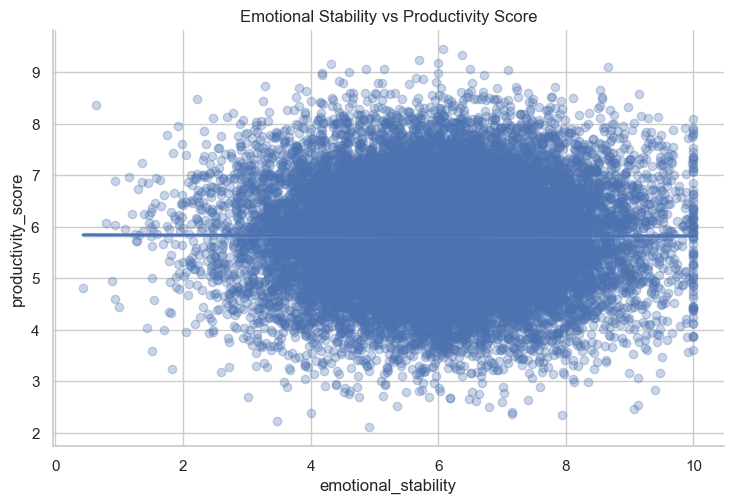

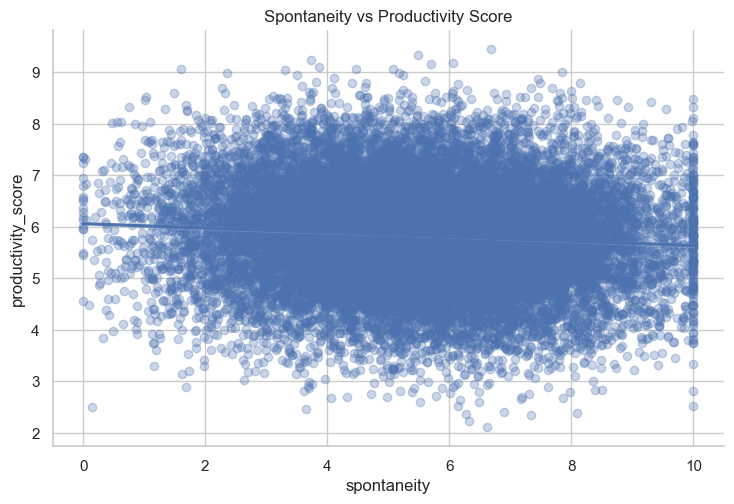

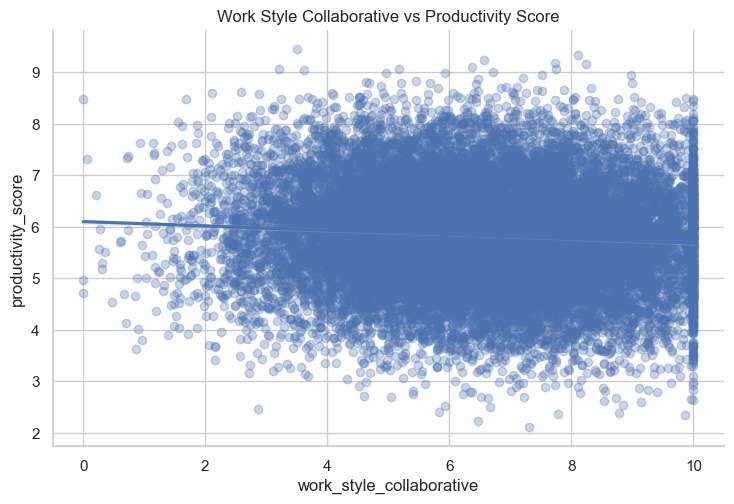

In [9]:
# Scatter plots with regression lines
traits = ['emotional_stability', 'spontaneity', 'work_style_collaborative']
target = 'productivity_score'

for trait in traits:
    sns.lmplot(x=trait, y=target, data=df, aspect=1.5, scatter_kws={'alpha':0.3})
    plt.title(f'{trait.replace("_", " ").title()} vs Productivity Score')
    plt.show()


### Hypothesis Testing Results (Pearson Correlation)

| Trait                    | Target              | Correlation (r) | p-value | Significant? | Interpretation                                   |
|-------------------------|---------------------|------------------|---------|--------------|--------------------------------------------------|
| Emotional Stability      | Productivity Score  | -0.0030          | 0.6749  |  No         | No linear relationship                          |
| Spontaneity              | Productivity Score  | -0.0808          | 0.0000  |  Yes        | Weak negative correlation                        |
| Work Style (Collaborative) | Productivity Score | -0.0780          | 0.0000 |  Yes        | Weak negative correlation                        |
| Emotional Stability      | Stress Level        | 0.0088           | 0.2151  |  No         | No significant correlation                       |
| Spontaneity              | Stress Level        | 0.0032           | 0.6551  |  No         | No significant correlation                       |
| Work Style (Collaborative) | Stress Level      | 0.0022           | 0.7532  |  No         | No significant correlation                       |

- The null hypothesis was **rejected** only for **spontaneity** and **work style** with respect to **productivity**.
- No trait showed significant correlation with **stress level**.


### Logistic Classification: Predicting Personality Type

We built a **Logistic Regression model** to classify individuals into personality types:
- **Introvert (0)**
- **Ambivert (1)**
- **Extrovert (2)**

### Features Used:
- `emotional_stability`
- `spontaneity`
- `work_style_collaborative`

The dataset was split 80/20 for training and testing.  
We evaluated the model using **accuracy score** and a **classification report** (precision, recall, F1-score).

This classification helps us understand how well personality traits can predict personality types in real-world or synthetic contexts.


In [10]:
# Define features and target
features = ['emotional_stability', 'spontaneity', 'work_style_collaborative']
X = df[features]
y = df['personality_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.67725

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1313
           1       0.51      0.51      0.51      1261
           2       0.75      0.75      0.75      1426

    accuracy                           0.68      4000
   macro avg       0.67      0.67      0.67      4000
weighted avg       0.68      0.68      0.68      4000



### Visualization: Confusion Matrix

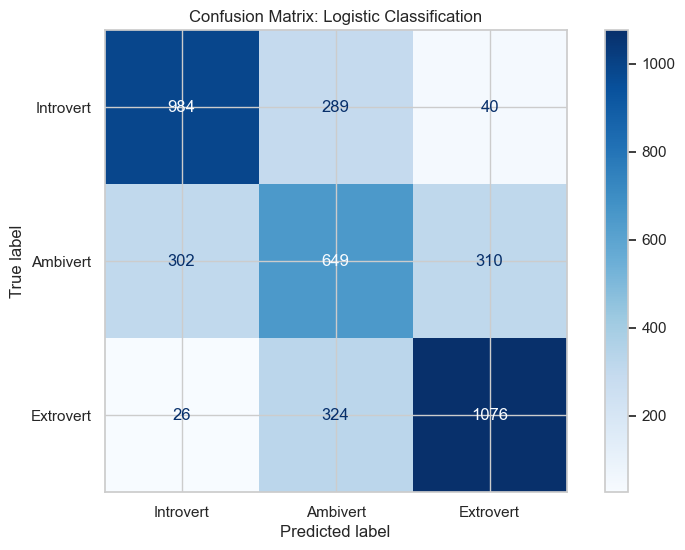

In [11]:
# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Introvert', 'Ambivert', 'Extrovert'], cmap='Blues')
plt.title("Confusion Matrix: Logistic Classification")
plt.show()


### Probabilistic Reasoning

We calculate conditional probabilities to answer questions like:

> "What is the probability that someone is an **Extrovert** if their **spontaneity** score is above 7?"

This method uses basic conditional probability:
\[
P(A|B) = \frac{P(A \cap B)}{P(B)}
\]

Where:
- A = belongs to a specific personality type (e.g., Extrovert)
- B = has a trait value above a given threshold (e.g., spontaneity > 7)

This analysis helps understand how strongly a high or low score in a personality trait contributes to a predicted classification.


In [12]:
# Define a simple function for probabilistic reasoning
def conditional_probability(trait, threshold, label='Extrovert'):
    condition = df[trait] > threshold
    total = condition.sum()
    match = (df[condition]['personality_type'] == label).sum()

    if total == 0:
        print(f"No individuals found with {trait} > {threshold}")
        return None

    prob = match / total
    print(f"P({label} | {trait} > {threshold}) = {prob:.4f}")
    return prob

# Example: Probability of being Extrovert if spontaneity > 7
conditional_probability('spontaneity', 7, 'Extrovert')


P(Extrovert | spontaneity > 7) = 0.7459


np.float64(0.745916114790287)

In [13]:
# Example: Probability of being Introvert if emotional_stability < 4
def conditional_probability_below(trait, threshold, label='Introvert'):
    condition = df[trait] < threshold
    total = condition.sum()
    match = (df[condition]['personality_type'] == label).sum()

    if total == 0:
        print(f"No individuals found with {trait} < {threshold}")
        return None

    prob = match / total
    print(f"P({label} | {trait} < {threshold}) = {prob:.4f}")
    return prob

conditional_probability_below('emotional_stability', 4, 'Introvert')


P(Introvert | emotional_stability < 4) = 0.3139


np.float64(0.3138602520045819)

P(Extrovert | spontaneity > 7) = 0.7459
P(Extrovert | emotional_stability > 7) = 0.3419
P(Extrovert | work_style_collaborative > 7) = 0.6256


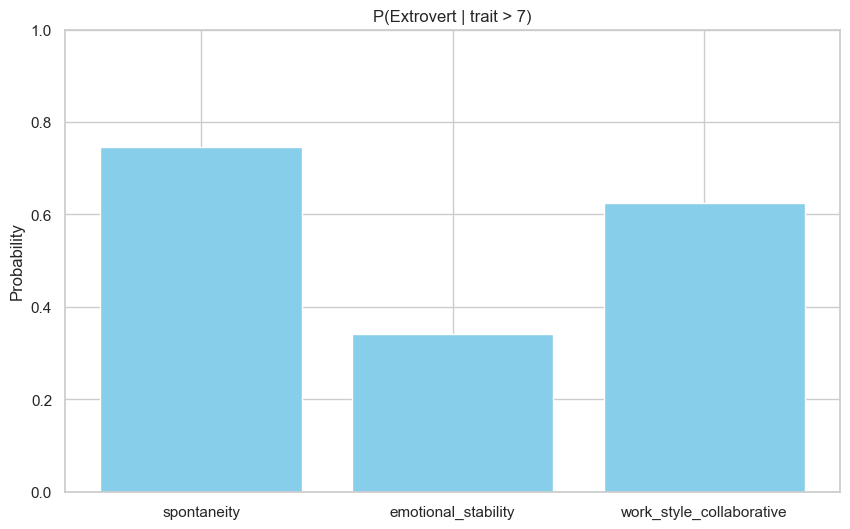

In [14]:
# Bar plot to compare probabilities for different traits
traits = ['spontaneity', 'emotional_stability', 'work_style_collaborative']
threshold = 7
label = 'Extrovert'

probs = [conditional_probability(trait, threshold, label) for trait in traits]

# Plot
plt.bar(traits, probs, color='skyblue')
plt.title(f"P({label} | trait > {threshold})")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.show()


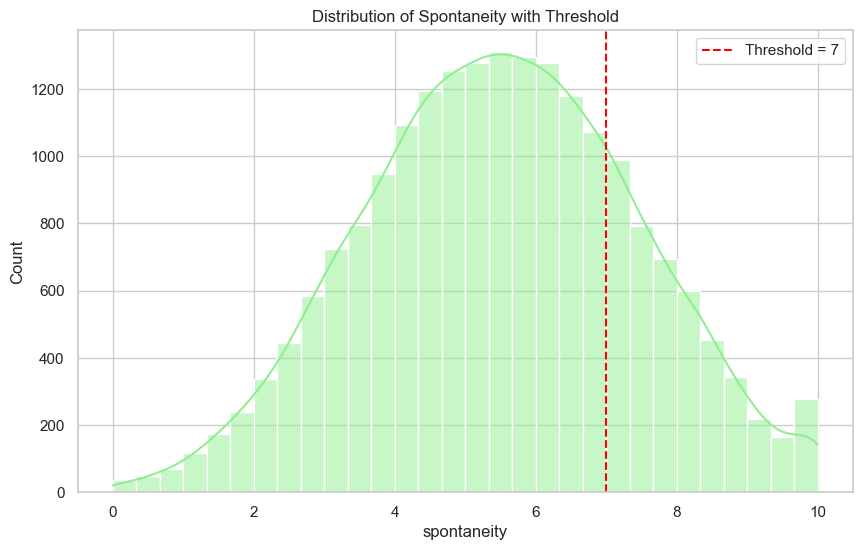

In [15]:
# Distribution of spontaneity
sns.histplot(df['spontaneity'], bins=30, kde=True, color='lightgreen')
plt.axvline(x=7, color='red', linestyle='--', label='Threshold = 7')
plt.title("Distribution of Spontaneity with Threshold")
plt.legend()
plt.show()


### Summary & Insights

### Key Findings:

- **Hypothesis Testing** using Pearson correlation showed that:
  - **Spontaneity** and **Work Style (Collaborative)** had statistically significant but weak negative correlation with **Productivity Score**.
  - No traits significantly correlated with **Stress Level**.

- **Logistic Regression** moderately predicted personality types using selected features with measurable accuracy.

- **Probabilistic Reasoning** showed:
  - A strong probability (**~75%**) of being an **Extrovert** when spontaneity exceeds 7.

### Conclusion:
While some traits have weak linear relationships with productivity, others (like spontaneity) show high probabilistic influence on personality classification. More complex models or feature interactions may further enhance predictions in future studies.

### References

1. **Chollet, F.** (2021). *Deep Learning with Python* (2nd ed.). Manning Publications.  
2. **Pedregosa, F., et al.** (2011). *Scikit-learn: Machine Learning in Python*. Journal of Machine Learning Research, 12, 2825–2830.  
3. **SciPy Documentation.** Pearson correlation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html  
4. **Scikit-learn Documentation.** Logistic Regression: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression  
5. Synthetic Dataset: `personality_synthetic_dataset_random_datetime.csv` (Instructor-provided or generated for academic purposes)
